In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
df=pd.read_csv('all_records.csv')

## Preprocessing

In [3]:
df.head()

,Unnamed: 0,Animal ID,Name_intake,DateTime_intake,MonthYear_intake,Found_Location,Intake_Type,IntakeCondition,Animal_Type_intake,Sex,...,beagle,terrier,boxer,poodle,rottweiler,dachshund,chihuahua,pit bull,DateTime_length,Days_length
0,0,A730601,NaN,2016-07-07 12:11:00,07/07/2016 12:11:00 PM,1109 Shady Ln in Austin (TX),Stray,Normal,Cat,Intact Male,...,0,0,0,0,0,0,0,0,0 days 20:49:00.000000000,0-7 days
1,1,A683644,*Zoey,2014-07-13 11:02:00,07/13/2014 11:02:00 AM,Austin (TX),Owner Surrender,Nursing,Dog,Intact Female,...,0,0,0,0,0,0,0,0,115 days 23:04:00.000000000,12 weeks - 6 months
2,2,A676515,Rico,2014-04-11 08:45:00,04/11/2014 08:45:00 AM,615 E. Wonsley in Austin (TX),Stray,Normal,Dog,Intact Male,...,0,0,0,0,0,0,0,1,3 days 09:53:00.000000000,0-7 days
3,3,A742953,NaN,2017-01-31 13:30:00,01/31/2017 01:30:00 PM,S Hwy 183 And Thompson Lane in Austin (TX),Stray,Normal,Dog,Intact Male,...,0,0,0,0,0,0,0,0,4 days 00:47:00.000000000,0-7 days
4,4,A679549,*Gilbert,2014-05-22 15:43:00,05/22/2014 03:43:00 PM,124 W Anderson in Austin (TX),Stray,Normal,Cat,Intact Male,...,0,0,0,0,0,0,0,0,24 days 22:11:00.000000000,3-6 weeks


In [4]:
# Drop unnecessary columns
# Drop Name_intake since there is a Intake_type column
# Drop all single breed type column since we need to do our own encoding for breed_intake
df=df.drop(columns=['Unnamed: 0','Name_intake','Name_outcome','MonthYear_intake','MonthYear_outcome',
                    'gender_intake','gender_outcome','fixed_intake','fixed_outcome','Days_length','Outcome_Subtype',
                   'retriever','shepherd','beagle','terrier','boxer','poodle','rottweiler','dachshund','chihuahua',
                   'pit bull','Age','Age_upon_Outcome'])

In [5]:
df=df.dropna()

In [6]:
# View Outcome_Type values
df.Outcome_Type.value_counts()

Adoption           32408
Transfer           20799
Return to Owner    17394
Euthanasia          5470
Died                 553
Disposal             257
Missing               51
Rto-Adopt             23
Relocate              13
Name: Outcome_Type, dtype: int64

In [7]:
# Combine Died & Disposal Outcomes
df.loc[df.Outcome_Type == 'Disposal', 'Outcome_Type'] = 'Died'

In [8]:
# Combine Transfer & Relocate Outcomes
df.loc[df.Outcome_Type == 'Relocate', 'Outcome_Type'] = 'Transfer'

In [9]:
# Combine Rto-Adopt & Return to Owner
df.loc[df.Outcome_Type == 'Rto-Adopt', 'Outcome_Type'] = 'Return to Owner'

In [10]:
# Review Outcome_Type values
df.Outcome_Type.value_counts()

Adoption           32408
Transfer           20812
Return to Owner    17417
Euthanasia          5470
Died                 810
Missing               51
Name: Outcome_Type, dtype: int64

In [11]:
# Update DateTime_intake to datatime datatype
df.DateTime_intake = pd.to_datetime(df.DateTime_intake, format='%Y-%m-%d').dt.date

In [12]:
# Update DateTime_outcome to datatime datatype
df.DateTime_outcome = pd.to_datetime(df.DateTime_outcome, format='%Y-%m-%d').dt.date

In [13]:
# Update DateTime_length to dateformat and format length of stay column for just days
df.DateTime_length = df.DateTime_outcome - df.DateTime_intake
df.DateTime_length = df.DateTime_length / np.timedelta64(1, 'D')

In [14]:
# Rename DateTime_length to length of stay
df = df.rename(columns={'DateTime_length': 'length_of_stay'})

In [18]:
# Create a new column for Intake_Month
df['intake_month'] = pd.DatetimeIndex(df.DateTime_intake).month

In [20]:
# Create a new column for Outcome_month
df['outcome_month'] = pd.DatetimeIndex(df.DateTime_outcome).month

In [22]:
# remove nagative values from length_of_stay
df = df[df.length_of_stay >= 0]

<AxesSubplot:xlabel='length_of_stay', ylabel='Count'>

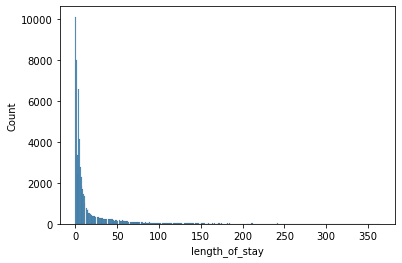

In [23]:
# review distribution of length of stay
sns.histplot(data= df[df.length_of_stay < 365], x='length_of_stay')

In [24]:
# review statistics of length of stay
df.length_of_stay.describe()

count    69820.000000
mean        34.953967
std         97.664798
min          0.000000
25%          1.000000
50%          6.000000
75%         22.000000
max       1236.000000
Name: length_of_stay, dtype: float64

In [25]:
# bucket length of stay
cut_labels = ['1 Day', '1 Week', '1 Month', '6 Months', '> 1 Year']
cut_bins = [-1, 2, 8, 31, 183, 366]
df['length_stay_bins'] = pd.cut(df['length_of_stay'], bins=cut_bins, labels=cut_labels)

In [26]:
df.length_stay_bins.value_counts()

1 Day       21481
1 Week      20067
1 Month     13826
6 Months    11288
> 1 Year     1791
Name: length_stay_bins, dtype: int64

In [27]:
# Combine Aged and Feral with Other for IntakeCondition
df.loc[(df.IntakeCondition == 'Aged') | (df.IntakeCondition == 'Feral'), 'IntakeCondition'] = 'Other'

In [28]:
# Combine Injured and Sick for Intake Condition
df.loc[(df.IntakeCondition == 'Injured') | (df.IntakeCondition == 'Sick'), 'IntakeCondition'] = 'Medical'

In [29]:
# Combine Pregnant and Nursing for  IntakeCondition
df.loc[(df.IntakeCondition == 'Nursing') | (df.IntakeCondition == 'Pregnant'), 'IntakeCondition' ] = 'Maternity'

In [30]:
# Combine Bird and Livestock with Other for Animal_Type_intake
df.loc[(df.Animal_Type_intake == 'Bird') | (df.Animal_Type_intake == 'Livestock'), 'Animal_Type_intake'] = 'Other'

In [31]:
# rename Sex column to intake sex
df.rename(columns={'Sex': 'Sex_Intake'}, inplace=True)

In [32]:
# Create buckets to classify dog breed types
new_breed=[]
for i in df['Breed_intake']:
    if 'Mix' in i:
        i='Mix'
    elif "/" in i:
        i="Mix"
    elif 'Bull' in i or 'Staffordshire' in i or i=='Chinese Sharpei' or i=='Dogo Argentino' or i=='Boxer':
        i = 'Bully Breed'
    elif 'Terrier' in i:
        i= 'Terrier Breed'
    elif i=='Bat' or i=='Raccoon' or i=='Opossum' or i=='Duck' or i=='Fox' or i=='Grackle' or i=='Hawk' or i=='Coyote' or i=='Pigeon' or i=='Dove' or i=='Armadillo' or i=='Owl' or i=='Skunk' or i=='Squirrel' or i=='Mockingbird' or i=='Heron' or i=='Sparrow':
        i = 'Wildlife'
    elif 'Pointer' in i or 'Span' in i or i=='Vizsla' or i=='Brittany' or i=='Shiba Inu' or i=='Dalmatian' or i=='Standard Poodle' or i=='Carolina Dog' or i=='Weimaraner' or 'Husky' in i or 'Malamute' in i or 'Eskimo' in i or i=='Finnish Spitz' or i=='Samoyed' or i=='Keeshond' or i=='Jindo' or 'Retriever' in i or i=='Chesa Bay Retr':
        i = 'Sporting Breed'
    elif 'hound' in i or 'Hound' in i or i=='Beagle' or i=='Saluki' or 'Coon' in i or i=='Catahoula' or i=='Black Mouth Cur' or i=='Harrier' or i=='Blue Lacy' or i=='Treeing Tennesse Brindle' or i=='Whippet':
        i = 'Hound Breed'
    elif i=='Shih Tzu' or i=='Miniature Poodle' or i=='Miniature Schnauzer' or i=='Maltese' or i=='Pomeranian' or i=='Lhasa Apso' or i=='Toy Poodle' or i=='Pekingese' or i=='Bichon Frise' or i=='Cavalier Span' or i=='West Highland' or i=='Papillon' or i=='Havanese' or i=='Japanese Chin' or i=='Dandie Dinmont' or i=='Bruss Griffon' or i=='Coton De Tulear' or 'Dachshund' in i or i=='French Bulldog' or i=='Pug' or i=='Miniature Pinscher' or i=='Pbgv' or 'Chihuahua' in i:
        i = 'Toy Breed'
    elif 'Australian' in i or 'Collie' in i or 'Heeler' in i or 'Sheepdog' in i or i=='English Shepherd' or i=='Dutch Shepherd' or 'Corgi' in i or i=='Beauceron' or i=='Hovawart':
        i = 'Herding Breed'
    elif i=='Chinese Sharpei' or i=='Chow Chow' or i=='Standard Schnauzer' or i=='Basenji' or i=='Rottweiler' or i=='Doberman Pinsch' or i=='German Shepherd' or i=='Belgian Malinois':
        i = 'Working Breed'
    elif i=='Great Pyrenees' or i=='Great Dane' or i=='Anatol Shepherd' or i=='Cane Corso' or i=='Rhod Ridgeback' or i=='Akita' or i=='Mastiff' or i=='Presa Canario' or 'Bernese' in i or i=='Burmese' or 'Bernard' in i or i=='Leonberger' or i=='Greater Swiss Mountain Dog' or i=='Boerboel'or i=='Landseer':
        i = 'X Large Breed'
    elif 'Domestic' in i or i=='Persian' or i=='Siamese' or i=='Domestic Longhair' or i=='Persian' or i=='Himalayan' or i=='Russian Blue' or i=='Bengal' or i=='Devon Rex' or i=='Sphynx' or i=='British Shorthair' or i=='Manx':
        i = 'Cat Breed'
    else:
        i='Other'
    new_breed.append(i)
df['Breed_Type'] = new_breed

In [33]:
df.Breed_Type.value_counts()

Mix               64990
Wildlife           1065
Toy Breed           752
Cat Breed           566
Bully Breed         545
Sporting Breed      500
Working Breed       384
Hound Breed         267
Herding Breed       221
Terrier Breed       212
Other               188
X Large Breed       130
Name: Breed_Type, dtype: int64

In [34]:
df.drop('Breed_intake', axis=1, inplace=True)

In [35]:
# Create buckets to catagorize color
colorNew=[]
for i in df.Color_intake:
    if "/" in i:
        i="Bicolor"
    elif "Tabby" in i:
        i='Tabby'
    elif "Brindle" in i:
        i="Tabby"
    elif "Merle" in i:
        i="Merle"
    elif "Tiger" in i:
        i="Tiger"
    elif "Tortie" in i:
        i="Tabby"
    elif "Calico" in i:
        i="Tabby"
    elif "Torbie" in i:
        i="Tabby"
    elif i=="Apricot" or i=="Gold" or i=="Yellow" or i=="Fawn":
        i="Orange"
    elif "Blue" in i:
        i="Blue"
    elif "Black" in i or i=="Sable":
        i="Black"
    elif i=="Liver":
        i="Brown"
    elif "Point" in i:
        i='Point'
    elif "Tick" in i:
        i="Point"
    else:
        i=i
    colorNew.append(i)
df.Color_intake =colorNew

In [36]:
# Update colors with less than 500 values to Other
color_counts=df['Color_intake'].value_counts()
replace_color=color_counts.loc[color_counts<500].index.tolist()
for i in replace_color:
    df.Color_intake = df.Color_intake.replace(i,"Other")

In [37]:
df.Color_intake.value_counts()

Bicolor     37442
Tabby       10874
Black        6148
Brown        2966
White        2524
Other        1993
Tricolor     1931
Tan          1794
Blue         1241
Point        1015
Red           964
Orange        928
Name: Color_intake, dtype: int64

In [38]:
df.head()

,Animal ID,DateTime_intake,Found_Location,Intake_Type,IntakeCondition,Animal_Type_intake,Sex_Intake,Color_intake,DateTime_outcome,Outcome_Type,Sex_upon_Outcome,fixed_changed,Age_Bucket,length_of_stay,intake_month,outcome_month,length_stay_bins,Breed_Type
0,A730601,2016-07-07,1109 Shady Ln in Austin (TX),Stray,Normal,Cat,Intact Male,Tabby,2016-07-08,Transfer,Neutered Male,1,7-12 months,1.0,7,7,1 Day,Mix
1,A683644,2014-07-13,Austin (TX),Owner Surrender,Maternity,Dog,Intact Female,Bicolor,2014-11-06,Adoption,Spayed Female,1,1-6 weeks,116.0,7,11,6 Months,Mix
2,A676515,2014-04-11,615 E. Wonsley in Austin (TX),Stray,Normal,Dog,Intact Male,Bicolor,2014-04-14,Return to Owner,Neutered Male,1,1-6 months,3.0,4,4,1 Week,Mix
3,A742953,2017-01-31,S Hwy 183 And Thompson Lane in Austin (TX),Stray,Normal,Dog,Intact Male,Bicolor,2017-02-04,Transfer,Intact Male,0,1-3 years,4.0,1,2,1 Week,Hound Breed
4,A679549,2014-05-22,124 W Anderson in Austin (TX),Stray,Normal,Cat,Intact Male,Bicolor,2014-06-16,Transfer,Neutered Male,1,1-6 months,25.0,5,6,1 Month,Mix


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69820 entries, 0 to 76975
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Animal ID           69820 non-null  object  
 1   DateTime_intake     69820 non-null  object  
 2   Found_Location      69820 non-null  object  
 3   Intake_Type         69820 non-null  object  
 4   IntakeCondition     69820 non-null  object  
 5   Animal_Type_intake  69820 non-null  object  
 6   Sex_Intake          69820 non-null  object  
 7   Color_intake        69820 non-null  object  
 8   DateTime_outcome    69820 non-null  object  
 9   Outcome_Type        69820 non-null  object  
 10  Sex_upon_Outcome    69820 non-null  object  
 11  fixed_changed       69820 non-null  int64   
 12  Age_Bucket          69820 non-null  object  
 13  length_of_stay      69820 non-null  float64 
 14  intake_month        69820 non-null  int64   
 15  outcome_month       69820 non-null  

# Machine Learning Model

In [64]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

## Encoding Text Columns

In [41]:
# Drop columns with to many unique values
df.drop(['Animal ID', 'Found_Location', 'DateTime_intake', 'DateTime_outcome'], axis=1, inplace=True)

In [42]:
# encode text columns with dummy values
df_encoded = pd.get_dummies(df, columns=['Intake_Type', 'IntakeCondition', 'Animal_Type_intake', 'Sex_Intake', 
                    'Color_intake', 'Sex_upon_Outcome', 'Age_Bucket', 'Breed_Type', 'length_stay_bins'])

In [43]:
le = LabelEncoder()
df_encoded['Outcome_Type'] = le.fit_transform(df_encoded['Outcome_Type'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Adoption': 0, 'Died': 1, 'Euthanasia': 2, 'Missing': 3, 'Return to Owner': 4, 'Transfer': 5}


In [69]:
df_encoded.head()

,Outcome_Type,fixed_changed,length_of_stay,intake_month,outcome_month,Intake_Type_Euthanasia Request,Intake_Type_Owner Surrender,Intake_Type_Public Assist,Intake_Type_Stray,Intake_Type_Wildlife,...,Breed_Type_Terrier Breed,Breed_Type_Toy Breed,Breed_Type_Wildlife,Breed_Type_Working Breed,Breed_Type_X Large Breed,length_stay_bins_1 Day,length_stay_bins_1 Week,length_stay_bins_1 Month,length_stay_bins_6 Months,length_stay_bins_> 1 Year
0,5,1,1.0,7,7,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,116.0,7,11,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,4,1,3.0,4,4,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,5,0,4.0,1,2,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,5,1,25.0,5,6,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


## Train Test Split Data

In [45]:
y = df_encoded.Outcome_Type
X = df_encoded.drop(columns='Outcome_Type')

In [46]:
# Split data to train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=1)

## Scale Data

In [70]:
# Scale features
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## RandomForest

In [71]:
# create model instance
model = RandomForestClassifier()

In [72]:
# fit model
model.fit(X_train_scaled, y_train)

RandomForestClassifier()

### Prediction

In [73]:
# Predict and view results
y_pred = model.predict(X_test)
results = pd.DataFrame({
   "Prediction": y_pred,
   "Actual": y_test
}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,4,4
1,5,5
2,4,0
3,0,5
4,4,0


### Evaluation

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

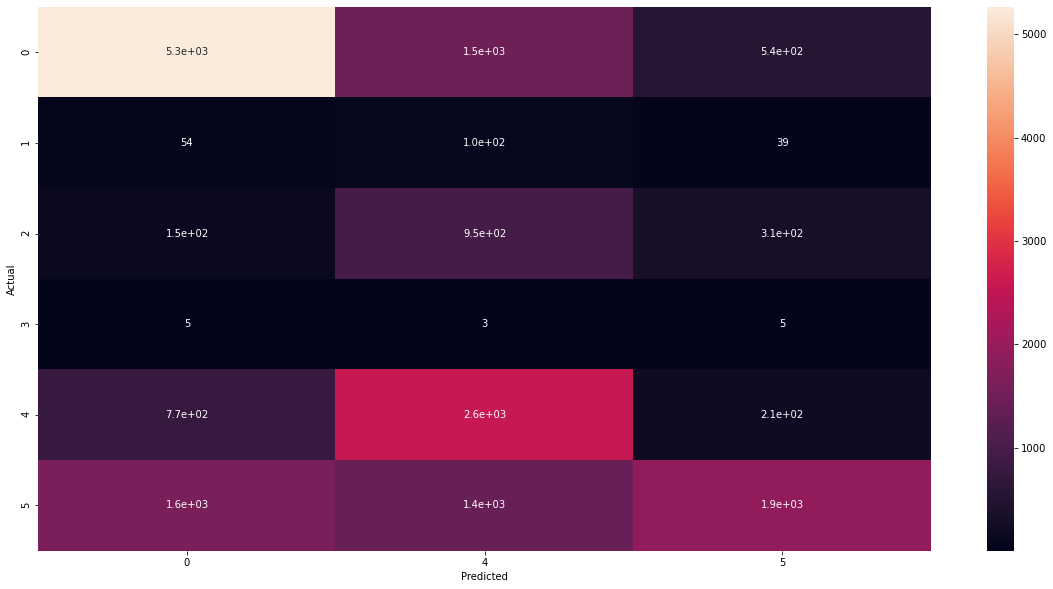

In [74]:
# print confusion matrix
data = {'y_Actual' : y_test,
       'y_Predicted': y_pred}
cm_df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(cm_df['y_Actual'], cm_df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix, annot=True)

In [75]:
# print classification report
print(classification_report(y_pred, y_test, target_names=['Adoption', 'Died', 'Euthanasia', 'Missing', 'Return to Owner', 'Transfer']))

                 precision    recall  f1-score   support

       Adoption       0.72      0.67      0.69      7886
           Died       0.00      0.00      0.00         0
     Euthanasia       0.00      0.00      0.00         0
        Missing       0.00      0.00      0.00         0
Return to Owner       0.72      0.40      0.51      6525
       Transfer       0.39      0.64      0.48      3044

       accuracy                           0.56     17455
      macro avg       0.31      0.28      0.28     17455
   weighted avg       0.66      0.56      0.59     17455



C:\Users\bweir\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bweir\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bweir\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Gradient Boosting

In [52]:
# create model instance
model = GradientBoostingClassifier()

In [53]:
# fit model
model.fit(X_train, y_train)

GradientBoostingClassifier()

### Prediction

In [54]:
# Predict and view results
y_pred = model.predict(X_test)
results = pd.DataFrame({
   "Prediction": y_pred,
   "Actual": y_test
}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,4,4
1,5,5
2,0,0
3,5,5
4,0,0


### Evaluation 

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

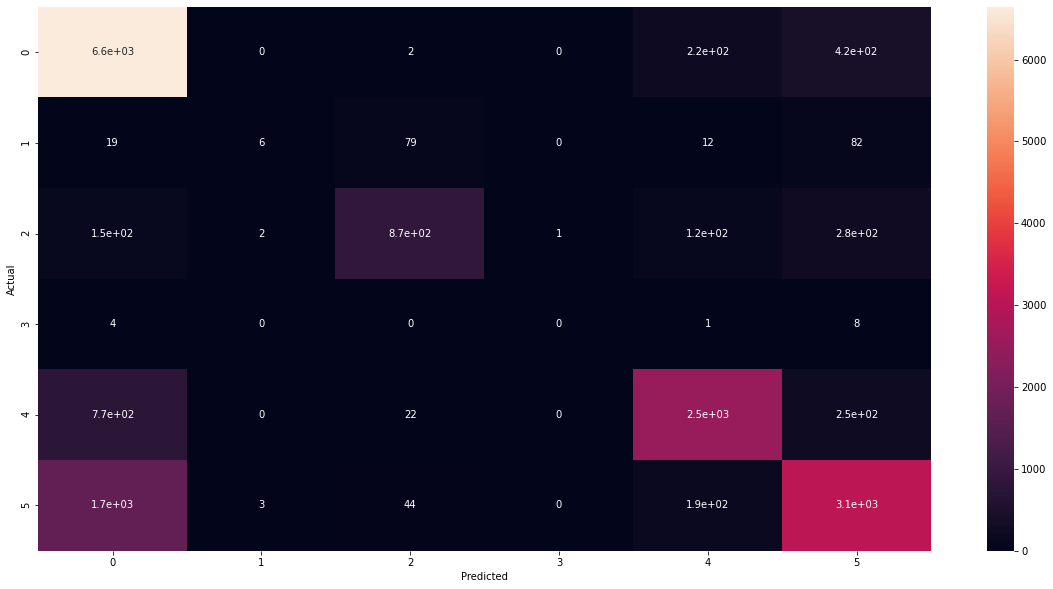

In [55]:
# print confusion matrix
data = {'y_Actual' : y_test,
       'y_Predicted': y_pred}
cm_df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(cm_df['y_Actual'], cm_df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix, annot=True)

In [56]:
# print classification report
print(classification_report(y_pred, y_test, target_names=['Adoption', 'Died', 'Euthanasia', 'Missing', 'Return to Owner', 'Transfer']))

                 precision    recall  f1-score   support

       Adoption       0.91      0.72      0.80      9246
           Died       0.03      0.55      0.06        11
     Euthanasia       0.61      0.85      0.71      1013
        Missing       0.00      0.00      0.00         1
Return to Owner       0.71      0.83      0.76      3060
       Transfer       0.62      0.75      0.68      4124

       accuracy                           0.75     17455
      macro avg       0.48      0.62      0.50     17455
   weighted avg       0.79      0.75      0.76     17455



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'length_of_stay'),
  Text(1, 0, 'fixed_changed'),
  Text(2, 0, 'Intake_Type_Owner Surrender'),
  Text(3, 0, 'Intake_Type_Wildlife'),
  Text(4, 0, 'Animal_Type_intake_Dog'),
  Text(5, 0, 'Intake_Type_Public Assist'),
  Text(6, 0, 'Sex_upon_Outcome_Intact Female'),
  Text(7, 0, 'Sex_upon_Outcome_Intact Male'),
  Text(8, 0, 'Animal_Type_intake_Cat'),
  Text(9, 0, 'IntakeCondition_Medical')])

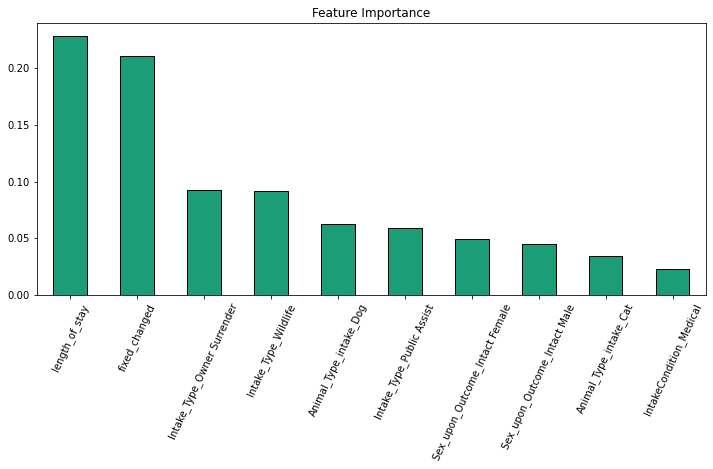

In [57]:
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='bar', figsize=(12,5), cmap='Dark2', edgecolor='black', title='Feature Importance')
plt.xticks(rotation=65)

## Decision Tree

In [58]:
# create model instance
model = DecisionTreeClassifier()

In [59]:
# fit model
model.fit(X_train, y_train)

DecisionTreeClassifier()

### Prediction

In [60]:
# Predict and view results
y_pred = model.predict(X_test)
results = pd.DataFrame({
   "Prediction": y_pred,
   "Actual": y_test
}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,4,4
1,5,5
2,0,0
3,5,5
4,0,0


### Evaluation

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

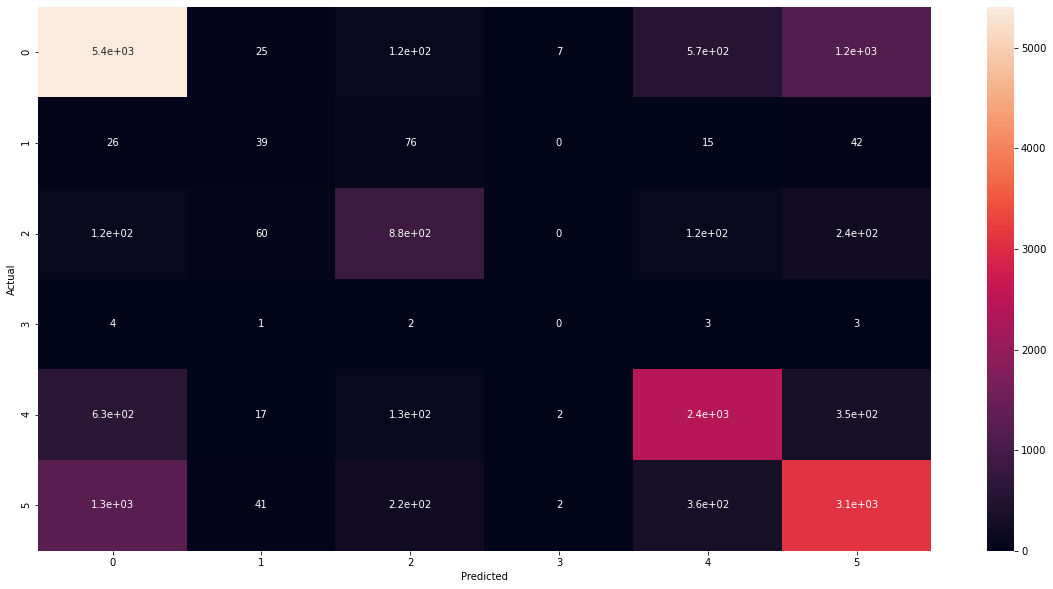

In [61]:
# print confusion matrix
data = {'y_Actual' : y_test,
       'y_Predicted': y_pred}
cm_df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(cm_df['y_Actual'], cm_df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix, annot=True)

In [62]:
# print classification report
print(classification_report(y_pred, y_test, target_names=['Adoption', 'Died', 'Euthanasia', 'Missing', 'Return to Owner', 'Transfer']))

                 precision    recall  f1-score   support

       Adoption       0.74      0.73      0.73      7447
           Died       0.20      0.21      0.20       183
     Euthanasia       0.62      0.62      0.62      1421
        Missing       0.00      0.00      0.00        11
Return to Owner       0.69      0.70      0.69      3506
       Transfer       0.62      0.63      0.63      4887

       accuracy                           0.68     17455
      macro avg       0.48      0.48      0.48     17455
   weighted avg       0.68      0.68      0.68     17455

